In [3]:

pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 243.2 kB/s eta 0:08:

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
gold_data = yf.download('GC=F', start='2014-02-01', end='2024-07-01')
gold_data = gold_data[['Close']].dropna()
gold_data.reset_index(inplace=True)
gold_data['Date'] = gold_data['Date'].map(pd.Timestamp.toordinal)

[*********************100%%**********************]  1 of 1 completed


In [3]:
gold_data = gold_data[['Close']]
gold_data = gold_data.dropna()

gold_data.reset_index(inplace=True)

gold_data['Date'] = gold_data['Date'].map(pd.Timestamp.toordinal)

print(gold_data.head())

     Date        Close
0  735267  1260.400024
1  735268  1251.699951
2  735269  1257.300049
3  735270  1257.599976
4  735271  1263.300049


In [6]:
X = gold_data[['Date']]
Y = gold_data['Close']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [9]:
model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [10]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [11]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 649.956629349092
R^2 Score: 0.9938388664894084


In [15]:
X_test_flat = X_test.flatten() if len(X_test.shape) > 1 else X_test
Y_test_flat = Y_test.flatten() if len(Y_test.shape) > 1 else Y_test
Y_pred_flat = Y_pred.flatten() if len(Y_pred.shape) > 1 else Y_pred

In [16]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

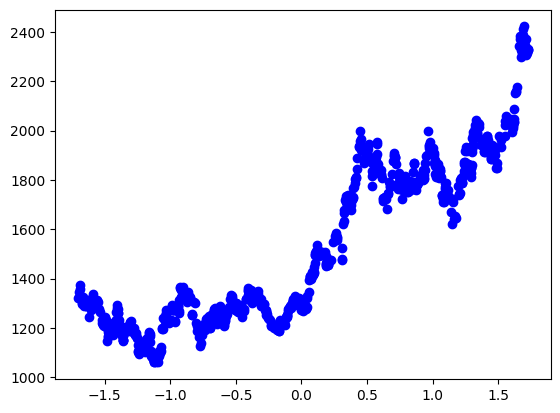

In [17]:
plt.scatter(X_test_flat, Y_test_flat, color='blue', label='Actual Prices')

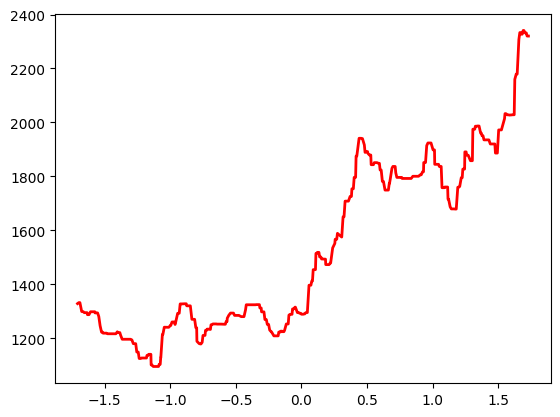

In [18]:
sorted_indices = np.argsort(X_test_flat)
plt.plot(X_test_flat[sorted_indices], Y_pred_flat[sorted_indices], color='red', linewidth=2, label='Predicted Prices')

C:\Users\Anmol Chaubey\AppData\Local\Temp\ipykernel_3044\2996466559.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


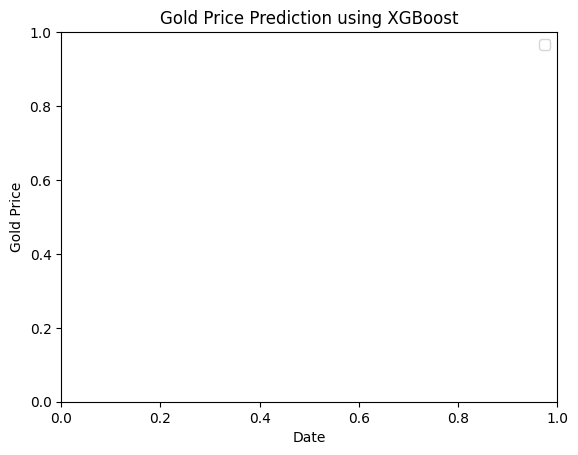

In [19]:
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Prediction using XGBoost')
plt.legend()
plt.show()